# Collect and Analyze a Twitter Network
[Effrosyni Simou](http://lts4.epfl.ch/simou), *PhD Student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

# Objective of Exercise
The aim of this exercise is to learn how to create your own, real network using data collected from the Internet and then to discover some properties of the collected network. 

# Resources
You might want to have a look at the following resources before starting:

* [Twitter REST API](https://dev.twitter.com/rest/public)
* [Tweepy Documentation](http://tweepy.readthedocs.io/en/v3.5.0/)
* [Tutorial "Mining Twitter data with Python"](https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/)

# 1. Collect a Twitter Network

In order to collect data from Twitter you will need to generate access tokens.  To do this you will need to register a [client application with Twitter](https://apps.twitter.com/). Once you are done you should have your tokens. You can now create a `credentials.ini` file as follows:
```
[twitter]
consumer_key = YOUR-CONSUMER-KEY
consumer_secret = YOUR-CONSUMER-SECRET
access_token = YOUR-ACCESS-TOKEN
access_secret = YOUR-ACCESS-SECRET
```
In this way you will have this information readily available to you. 

In [1]:
%matplotlib inline

import random
import configparser
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import tweepy  # you will need to install tweepy first

In [2]:
# Read the confidential token.
credentials = configparser.ConfigParser()
credentials.read('credentials.ini')

#authentication
auth = tweepy.OAuthHandler(credentials.get('twitter', 'consumer_key'), credentials.get('twitter', 'consumer_secret'))
auth.set_access_token(credentials.get('twitter', 'access_token'), credentials.get('twitter', 'access_secret'))

#construct API instance
#deal with rate limits and notify when delayed because of rate limits
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Now you are all set up to start collecting data from Twitter! 

In this exercise we will construct a network with the following logic:

1) We will chose a `user_id` in Twitter to be our first node. 

2) We will find (some) of the users who are both following `user_id` and are being followed by `user_id`. From now on we will call such users "connections" of `user_id`. We will place these user ids in a list called `first_nodes`. 

3) For every node in the list `first_nodes` we will then find (some) of the users who are following and are being followed by this node (aka the connections of this node). The user ids collected in this step will be placed in a list called `second_nodes`.

4) The collection of the ids of all nodes (aka Twitter users) that we have collected so far will be placed in a list called `all_nodes`.

5) Since we have only collected a subset of all possible "connections" for our nodes we have to check if there are any remaining inner connections that we have missed.

The entire network is to be organized in a dictionary with entries that will have as key the Twitter id of the user (this is a number characterizing each user in Twitter) and as value the list of ids of his connections.

So, let us begin. The first thing that you will have to do is to chose the node from which everything will start. I have chosen the Twitter account of [Applied Machine Learning Days](https://www.appliedmldays.org) that will take place in January 2018 in EPFL. You may change that if you wish to, but please make sure that the user you chose has both followers and friends and that he allows you to access this data.

In [3]:
user = 'appliedmldays '
#user = 'VincartAdrien'

user_id=api.get_user(user).id
#user2_id=api.get_user(user2).id

In the following cell write a function that takes as an argument the Twitter id of a user and returns a list with the **ids** of his connections. Take into account the case where a user does not allow you to access this information.

**Reminder:** By connections we mean users that are both followers and friends of a given user.

In [4]:
def find_connections(user_id):
    # gets the number of followers and friends
    followers = api.followers_ids(user_id)
    friends = api.friends_ids(user_id)
    # computes the intersection of those 2 sets : number of connections
    connections = list(set(friends) & set(followers))
    return connections

In [5]:
first_connections=find_connections(user_id)
print('{} has {} connections'.format(user, len(first_connections)))


appliedmldays  has 139 connections


Collect your `first_nodes` and `second_nodes` and organize your collected nodes and their connections in the dictionary called `network`.

Hints:
* Use `random.choice([1,3,4])` to randomly choose a number in `[1, 3, 4]`.
* Use the `append` and `remove` methods to add and remove an element from a Python list.
* The `pop` method removes the last item in the list.

In [10]:
network = {}
first_nodes=[]
second_nodes=[]
how_many=18 #This is the number of connections you are sampling. 
          #Keep small (e.g.3) for development, larger later (e.g. 10)
first_nodes = random.choices(find_connections(user_id), k=how_many)

for node in first_nodes:
    print(node)
    network[node] = list(set(random.choices(find_connections(node), k=how_many)))
    second_nodes += network[node]
    
original_network = network.copy()

54089550
885454501989294081
24250587
45099110
195301167
862060568
381054288
66135363
83657910
147227606
Rate limit reached. Sleeping for: 579
854226651944824832
140856473
3266720504
850645992
902492639865577472
869090336668237824
392695595
243295960


In [51]:
network.clear()
network = original_network.copy()

**Be careful!** You should only keep a small value for the `how_many` parameter while you are developing your code. In order to answer to the questions you should raise the value of this parameter to `how_many=10` at least. This will take a while to execute because of the API rate limit (plan your time accordingly). You should also remember to submit your jupyter notebook with the **output shown for a large value of the `how_many` parameter**. 

In [52]:
network[user_id] = first_nodes
first_nodes

[54089550,
 885454501989294081,
 24250587,
 45099110,
 195301167,
 862060568,
 381054288,
 66135363,
 83657910,
 147227606,
 854226651944824832,
 140856473,
 3266720504,
 850645992,
 902492639865577472,
 869090336668237824,
 392695595,
 243295960]

In [53]:
pprint(network)

{24250587: [40438400,
            354311009,
            1570368000,
            402788228,
            3432006886,
            294901801,
            127974893,
            2821503184,
            71019409,
            42078419,
            579708212,
            2644563450,
            2879163195,
            62345692],
 45099110: [15595329,
            527356866,
            184543773,
            820384135,
            166321640,
            426658557,
            553093933,
            18881614,
            31290415,
            259147663,
            2446473170,
            182801075,
            188238674,
            3065669909,
            5812922,
            2330710330,
            2754352477,
            125758783],
 54089550: [763052115392593920],
 66135363: [96300736,
            722489064528719872,
            414979077,
            65093638,
            57553384,
            3319186506,
            72030668,
            2339814349,
            9935372,
            14888

In [54]:
#gets every node of the network dict.
#all_nodes=sum([[entry] + [node for node in network[entry]] for entry in network.keys() ],[])
all_nodes = [user_id] + first_nodes + second_nodes
#removes all the duplicates
all_nodes = list(set(all_nodes))

In [55]:
print('There are {} first hop nodes'.format(len(first_nodes)))
print('There are {} second hop nodes'.format(len(second_nodes)))
print('There are overall {} nodes in the collected network'.format(len(all_nodes)))

There are 18 first hop nodes
There are 254 second hop nodes
There are overall 264 nodes in the collected network


In [56]:
for i in second_nodes:
    network[i]=[]
network

{1258081: [],
 1491081: [],
 5223701: [],
 5812922: [],
 7948812: [],
 9935372: [],
 10359582: [],
 11578342: [],
 14077609: [],
 14112416: [],
 14177696: [],
 14194186: [],
 14385735: [],
 14888753: [],
 15352089: [],
 15595329: [],
 15867414: [],
 16110315: [],
 16853923: [],
 17412858: [],
 17645146: [],
 17752852: [],
 18406045: [],
 18407422: [],
 18881614: [],
 19378018: [],
 20292113: [],
 20523746: [],
 22032377: [],
 24076515: [],
 24250587: [40438400,
  354311009,
  1570368000,
  402788228,
  3432006886,
  294901801,
  127974893,
  2821503184,
  71019409,
  42078419,
  579708212,
  2644563450,
  2879163195,
  62345692],
 24621862: [],
 26218869: [],
 26284918: [],
 29294244: [],
 31290415: [],
 33315710: [],
 38148988: [],
 39351968: [],
 39463569: [],
 39975914: [],
 40438400: [],
 42078419: [],
 43851707: [],
 44695518: [],
 45099110: [15595329,
  527356866,
  184543773,
  820384135,
  166321640,
  426658557,
  553093933,
  18881614,
  31290415,
  259147663,
  2446473170,
 

Find the inner connections between your collected nodes that you might have missed because you sampled the connections.

In [57]:
for i in range(0,len(all_nodes)):
    for missed_node in network[all_nodes[i]]:
        #if (missed_node in network[all_nodes[i]])&(all_nodes[i] not in set(network[missed_node])):
        if (missed_node in first_nodes)&(all_nodes[i] not in set(network[missed_node])):
            network[missed_node].append(all_nodes[i])
    
network

{1258081: [],
 1491081: [],
 5223701: [],
 5812922: [],
 7948812: [],
 9935372: [],
 10359582: [],
 11578342: [],
 14077609: [],
 14112416: [],
 14177696: [],
 14194186: [],
 14385735: [],
 14888753: [],
 15352089: [],
 15595329: [],
 15867414: [],
 16110315: [],
 16853923: [],
 17412858: [],
 17645146: [],
 17752852: [],
 18406045: [],
 18407422: [],
 18881614: [],
 19378018: [],
 20292113: [],
 20523746: [],
 22032377: [],
 24076515: [],
 24250587: [40438400,
  354311009,
  1570368000,
  402788228,
  3432006886,
  294901801,
  127974893,
  2821503184,
  71019409,
  42078419,
  579708212,
  2644563450,
  2879163195,
  62345692],
 24621862: [],
 26218869: [],
 26284918: [],
 29294244: [],
 31290415: [],
 33315710: [],
 38148988: [],
 39351968: [],
 39463569: [],
 39975914: [],
 40438400: [],
 42078419: [],
 43851707: [],
 44695518: [],
 45099110: [15595329,
  527356866,
  184543773,
  820384135,
  166321640,
  426658557,
  553093933,
  18881614,
  31290415,
  259147663,
  2446473170,
 

# 2. Discover some of the properties of the collected network

## 2.1 Adjacency matrix

Congradulations! You have now created a dictionary that describes a real Twitter network!
We now want to transform this dictionary into the adjacency (or weight) matrix that you learned about in your first class. 

In [58]:
N = len(all_nodes)
W=np.zeros([N,N], dtype=int)

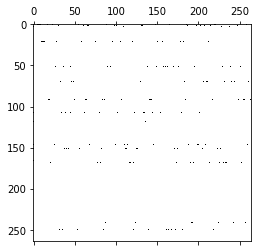

In [59]:
for i in range(0,N):
    W[i,:] = [n in network[all_nodes[i]] for n in all_nodes]    
plt.spy(W)

Remember that a weight matrix should be symmetric. Check if it is:

In [61]:
np.nonzero(W-W.transpose())

(array([  0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   4,   4,   4,   4,   4,   4,   4,   4,   5,
          6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20,  21,  22,  22,  22,  22,  22,  22,  22,  22,  22,  22,
         22,  22,  22,  22,  22,  22,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  45,  46,  47,  48,  49,  50,  51,  52,
         52,  52,  52,  52,  52,  52,  52,  52,  52,  52,  52,  52,  52,
         52,  52,  52,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  70,  70,  70,  70,
         70,  70,  70,  70,  70,  70,  70,  70,  70

**Question 1:**
It might happen that $W \neq W^{T} $ for some $(i,j)$. Explain why this might be the case.

**Your answer here:** It might happen when the network is directed. The link yould be valid in one direction i->j and not valid in the other direction j->i . Here we created a unidirectional network :  origin user -> first nodes -> second nodes. So it is perfectly normal that we don't have directly a symetric adjacency matrix. 

Impose your weight matrix to be symmetric.

In [62]:
# Make W is symmetric
bigger = W.transpose() > W
#plt.spy(bigger)

In [63]:
W = W - W*bigger + W.transpose()*bigger

Plot the weight matrix of your collected network.

Hint: use `plt.spy()` to visualize a matrix.

Text(0.5,1.05,'Adjacency Matrix W')

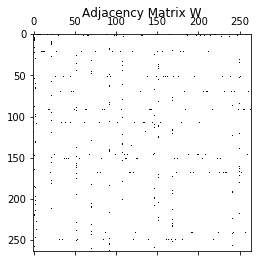

In [64]:
plt.spy(W)
plt.title('Adjacency Matrix W')

**Question 2:**
What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your collected network)? How many links $L$ are there in your collected network? Comment on how $L$ and $L_{max}$ compare.

In [65]:
L = int(sum(sum(W))/2)
L_max = int(N*(N-1)/2)

print("L = ", L)
print("L_max = ", L_max)

L =  254
L_max =  34716


In theory : $L_{max}$ = $\left( \begin{matrix} N \\ 2 \end{matrix} \right)$ . As we can see L in much smaller than $L_{max}$. This means that the network is very sparse, but this is perfectly normal as we are studying a social network, and a very small sample of it. 


## 2.2 Degrees distribution

Plot a histogram of the degree distribution. 

In [66]:
p = sum(W) 
print(p)

[ 6 18 16 16  8  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 17  1  1
  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1
  1  1 18  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 15  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 17  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 17  1  1 14  1  1  1  1  1  1  1  2  1  2  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 16  1  1
  1 17  1  1  1  1  1  1  1  1  1  1  1 17  1  1  1  1 18  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10  1  1  1  1  1  1  1  1
 17  1  1  1  1  1  1  1  1  1  1  1  1  1]


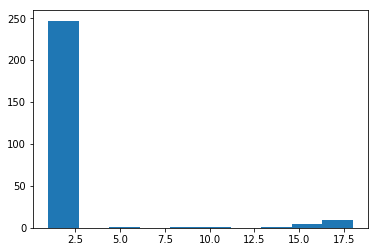

In [67]:
plt.hist(p);

**Question 3:** Comment on the plot. What do you observe? Would you expect a similar degree disribution in the complete Twitter network?

We observe that the distrubtion is mainly constituted of single links. This is because we sample randomly the the network. In the real twitter network, we should see at many single links. 

## 2.3 Average degree

Calculate the average degree of your collected network.

In [72]:
d_avg = sum(p)/N
d_avg

1.9242424242424243

## 2.4 Diameter of the collected network

**Question 4:** What is the diameter of the collected network? Please justify.

The diameter of the grah is the longest of the shortest path between 2 nodes. By construction the shortest path between 2 nodes of `first_nodes` will always pass through a the center of the network `user_id` or by a direct link : $d \leq 2$. The shortest path between two nodes of `second_node` would pass by a node of `first_nodes`or by the center of the network `user_id` : $d \leq 4$. So the longest of the shortest path would be the following diameter : $d_{max} =4$. 

## 2.5 Pruning the collected network

You might notice that some nodes have very few connections and hence our matrix is very sparse. Prune the collected network so that you keep only the nodes that have a degree that is greater than the average degree and plot the new adjacency matrix.

In [114]:
index_select = np.array([val >= d_avg for val in sum(W)])
print(type(all_nodes))

Wpruned = W[index_select,:]
Wpruned = Wpruned[:,index_select]

<class 'list'>


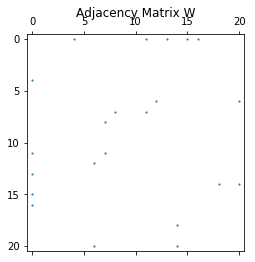

In [115]:
plt.spy(Wpruned, markersize=1)
plt.title('Adjacency Matrix W');

[5 0 0 0 1 0 2 2 1 0 0 2 1 1 2 1 1 0 1 0 2]


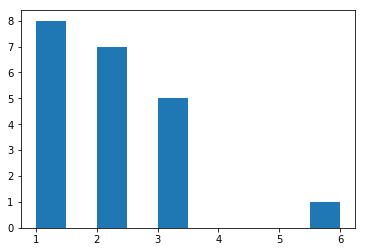

In [116]:
p = sum(Wpruned) 
print(p)
plt.hist(p+1);